# La librairie Seaborn  
_________________________________

## Durée du cours  
**1h**

_________________________________

## Contexte
### Pré-requis
- Connaissance de la syntaxe Python 
- Connaissance de la programmation orientée objet en Python 
- Mathématique niveau lycée 
- Compréhension des librairies numpy et pandas et matplotlib 
- De la bonne humeur et de la motivation 🚀


Nous avons vu durant le cours précédent que nous pouvons faire appel à la librairie matplotlib afin de tracer plein de sortes de graphiques. Par ailleurs son utilisation peut s'avérer complexe et chronophage. C'est pour cela que nous allons voir la librairie `seaborn` qui à une syntaxe plus legère  🥳 

_________________________________

## Sommaire 
* [Ajouter du style à vos graphiques](#style)
* [Encore plus de graphiques](#en+)
	- [Comprendre les Heatmap](#heat)
	- [Visualiser des relations avec Pairplot](#pair)
	- [Analyser des répartitions avec Kdeplot et PairGrid](#kde)
    - [Ajouter plus informations avec Joinplot](#join) 
    - [Expliciter les relations avec Relplot](#rel)

## [Ajouter du style à vos graphiques](#style)

Comme énoncé au ci-dessus, la librairie `seaborn` permet d'ajouter du 'style' à vos graphiques. En effet, elle permet plus de chose que `matplotlib` mais surtout elle permet d'intégrer directement les `pandas.DataFrame` ce qui est assez pratique, car c'est souvent le format de données 🔌

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

### Tracer des graphiques à partir d'un `DataFrame` 

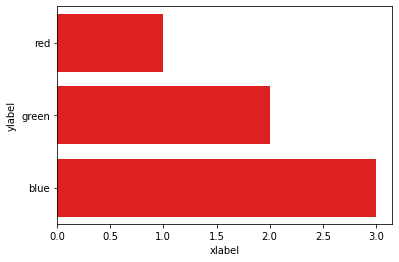

In [2]:
random_df = pd.DataFrame({'cat': ['red', 'green', 'blue'], 'val': [1, 2, 3]})
ax = sns.barplot(x='val', y='cat', data=random_df, color='red')
ax.set(xlabel='xlabel', ylabel='ylabel')
plt.show()

### Importer des données avec `seaborn`

Dans ce cours nous allons utiliser des données importée depuis la librairie `seaborn` avec la méthode 
```python 
load_dataset('nom du dataset')
```

Vous pouvez vous rendre sur [le site de seaborn](https://seaborn.pydata.org/generated/seaborn.load_dataset.html) afin de voir les dataset à disposition. 

In [3]:
titanic = sns.load_dataset('titanic')
iris = sns.load_dataset('iris')
tips = sns.load_dataset('tips')

#### Le dataset Titanic

Le dataset titanic est un jeu de données classique qui fait référence aux passagers du titanic. Il est utilisé afin de prédire la survie d'un passager donné en fonction de ses caractéristiques 🛥

In [4]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


#### Le dataset iris

Le jeu de donnée iris est lui aussi un classique, il répertorie 3 espèces d'iris ainsi que leurs caractérisitiques 🌺

In [4]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


#### Le dataset Tips
Ce dataset correspond à l'enregistrement d'informations par un serveur sur chaque pourboire qu'il a reçu sur une période de quelques mois en travaillant dans un restaurant 💁‍♂️

In [5]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


#### Exploration 

Maintenant que nos avons nos données, commençons par regarder plus en détail nos `DataFrame` avec les outils que nous avons appris 🧐

In [52]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
titanic_clean = titanic.dropna(how='any',subset=['embarked','embark_town'])

In [8]:
titanic_clean.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [12]:
df = titanic.copy()

In [11]:
df.age.isna().sum()

177

In [47]:
df.age = df.age.fillna('median')

In [13]:
df.who.value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

### Les graphiques de `seaborn`

De façon générale, un graphique seaborn s'écrit de la façon suivante : 
```python 
seaborn.un_graphique(x="une colonne de df", y="une autre colonne de df", df=pd.DataFrame, arguments)
```

Suivant votre graphique, vous allez avoir plusieurs arguments à vous de regarder la documentation associée à votre graphique 🤓

#### La fonction `distplot()`
Comme peut le laisser penser son nom, la fonction `distplot` est là pour représenter la distribution d'une variable numérique à l'aide d'un histogramme. 

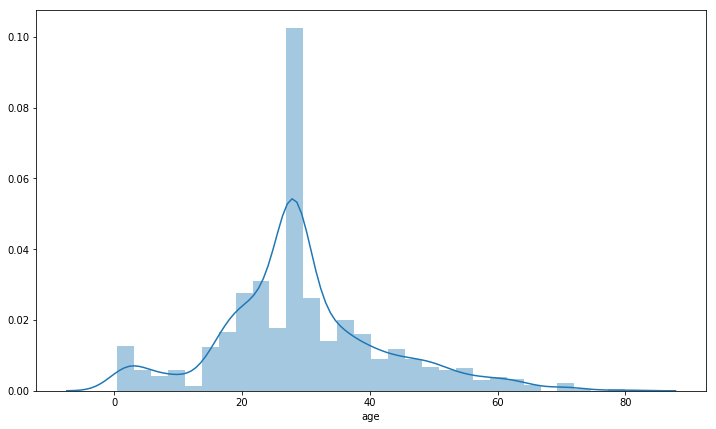

In [54]:
plt.figure(figsize=(12,7))
sns.distplot(df.age);

On peut observer un pic de valeurs autours du nombre 28, ce qui est tout à fait normal du fait qu'on ait remplacé les valeurs manquantes par la mediane qui est égale à 28. 

On peut aussi afficher notre histogramme comme dans matplotlib et non comme une distribution avec l'argument `kde` 🤓

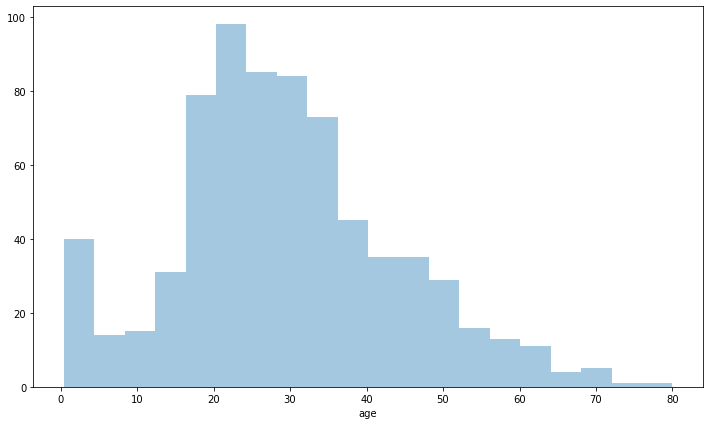

In [13]:
#sans l'option kde avec 20groupes 
plt.figure(figsize=(12,7))
sns.distplot(df.age, kde=False,bins=20);

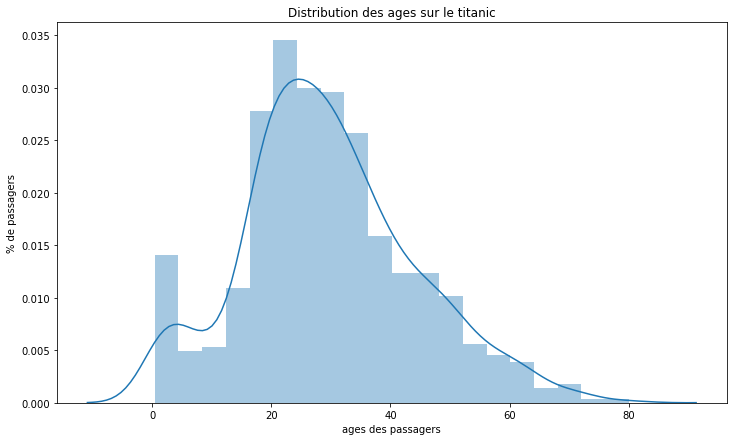

In [14]:
plt.figure(figsize=(12,7))
sns.distplot(df.age, bins=20)
plt.xlabel('ages des passagers')
plt.ylabel('% de passagers')
plt.title('Distribution des ages sur le titanic');

[Text(0, 0.5, 'ylabel'), Text(0.5, 0, 'xlabel')]

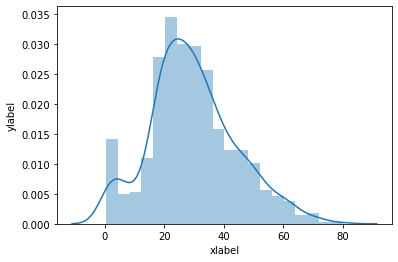

In [15]:
ax = sns.distplot(df.age, bins=20)
ax.set(xlabel='xlabel', ylabel='ylabel')

#### La fonction `countplot()`

Comme beaucoup de méthode seaborn cette fonction à un nom assez explicite. Elle permet de tracer des diagrammes en bar de variables catégoriques. 

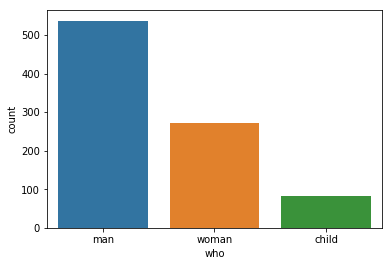

In [19]:
sns.countplot(df.who); 

Un argument intéressant qu'on les fonctions de seaborn c'est `hue` qui vous permet d'ajouter une variable/dimension à votre graphique. Voyons cela avec le dataset `tips`. 

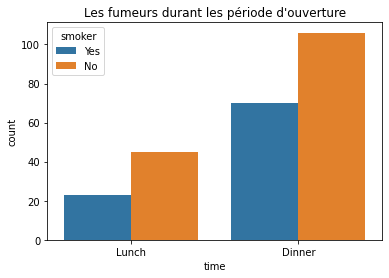

In [16]:
plt.figure()
sns.countplot(tips.time, hue=tips.smoker)
plt.title(u"Les fumeurs durant les période d'ouverture");

Seaborn a aussi sa syntaxe objet voyons cela avec la fonction `catplot()` 🤓

#### La fonction `catplot()`

Pour categorical plot, littéralement plot de variable catégorique. Encore une fois une méthode assez explicite. 

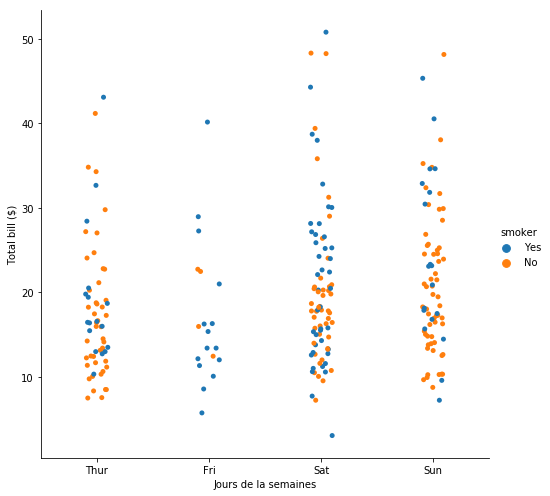

In [21]:
g = sns.catplot(x="day", y="total_bill", 
                data=tips, height=7, hue="smoker")
g.set_axis_labels("Jours de la semaines","Total bill ($)"); 

Comme vous pouvez le remarquer certaines méthodes de seaborn ont un argument `height` qui permet de gérer directement la taille de la figure sans faire appel à `plt.figure(figsize=(.,.))` ⚙️

Dans la fonction `catplot()` il y a un argument assez pratique : `kind` !  
Vous avez donc plusieurs choix de représentation de vos données 🧐

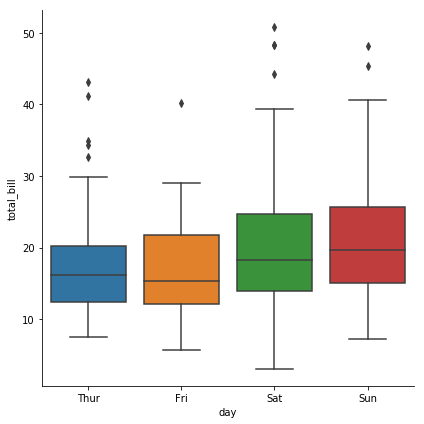

In [22]:
#boxplot like
sns.catplot(x="day", y="total_bill", kind="box", data=tips, height=6);

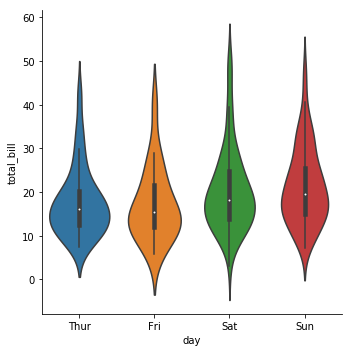

In [23]:
sns.catplot(x="day", y="total_bill", kind="violin", data=tips, height=5);

On peut aussi paqueter les graphiques comme dans `matplotlib` avec la fonction `subplots()` tel que : 

<Figure size 432x288 with 0 Axes>

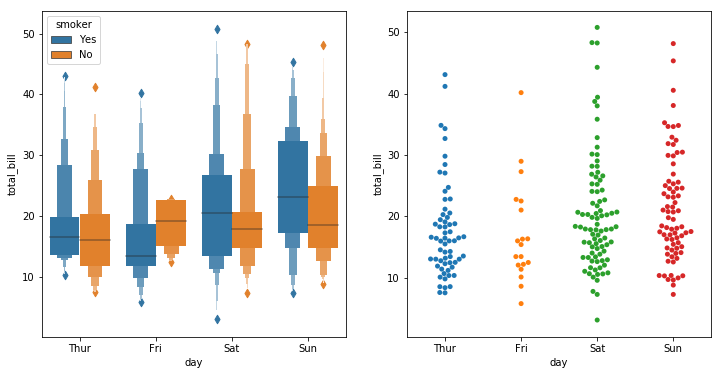

In [24]:
plt.figure()
f, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)
g1 = sns.catplot(x="day", y="total_bill",
            hue="smoker", ax=axes[0],
            kind="boxen", data=tips)
g2 = sns.catplot(x="day", y="total_bill", 
            kind="swarm", data=tips,
            ax=axes[1])
#catplot est une 'figure-level function'
    #cf http://seaborn.pydata.org/introduction.html#figure-level-and-axes-level-functions
plt.close(3), plt.close(4)
plt.show();

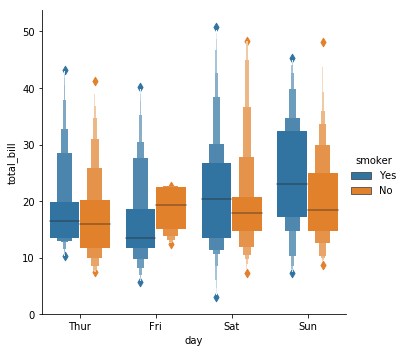

In [25]:
#add kind="boxen" tricks 
sns.catplot(x="day", y="total_bill", kind="boxen", hue="smoker", data=tips);

## [Encore plus de graphiques](#en+)


### Comprendre les Heatmap 

Les heatmap (carte de chaleur en anglais), sont une représentation graphique de données statistiques qui fait correspondre l'intensité d'une grandeur variable une gamme de tons ou un nuancier de couleurs sur une matrice à deux dimensions. 

Elles sont très utiles car souvent très parlantes. Ci-dessous deux utilisations de heatmap fort pratique. L'une pour l'affichage des corrélations dans le dataset `tips` et l'autre les valeurs manquantes dans le dataset `titanic`. 

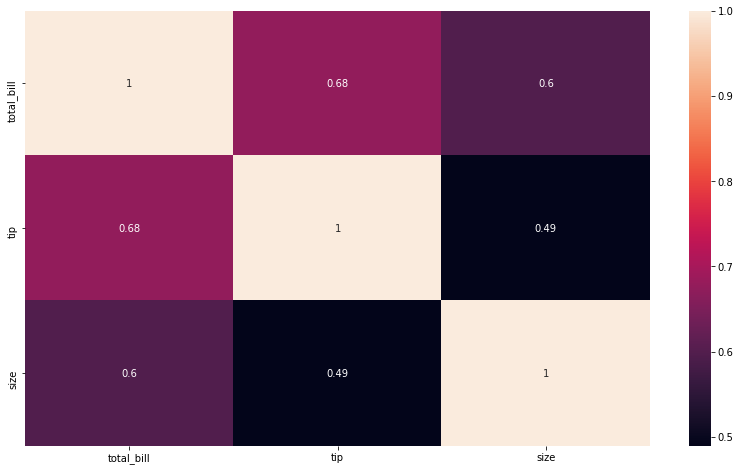

In [28]:
plt.figure(figsize=(14,8))
sns.heatmap(tips.corr(),annot=True);

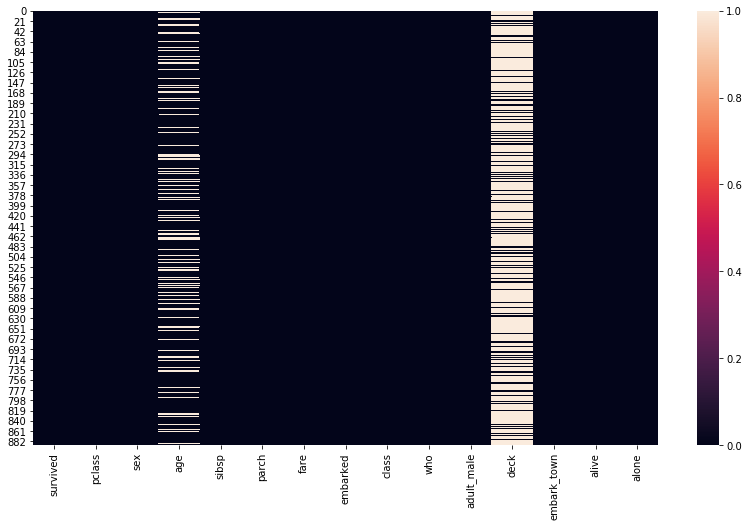

In [29]:
plt.figure(figsize=(14,8))
titanic = sns.load_dataset('titanic')
sns.heatmap(titanic.isna());

### [Visualiser des relations avec Pairplot](#pair)

Le `pairplot` permet de représenter la corrélation des variables deux à deux. Le résultat de la fonction `pairplot()` est une matrice symétrique avec la distribution des variables comme éléments diagonaux. 

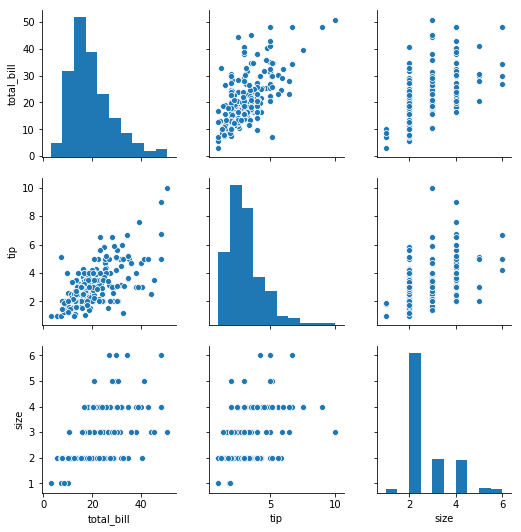

In [30]:
sns.pairplot(tips);

Si on prend comme exemple le dataset `tips` comme ci-dessus, on peut voir plusieurs chose : 
* Il y a une corrélation forte entre les variables `size` et `total_bill`
* Il y a une corrélation forte entre les variables `tip` et `total_bill`
* On note aussi une corrélation entre les variables `tip` et `size` 

On peut commme d'habitude se servir de l'argument `hue` afin d'ajouter une dimension au graphique, voyons ce que ça donne si on ajouter la variable `smoker`. 

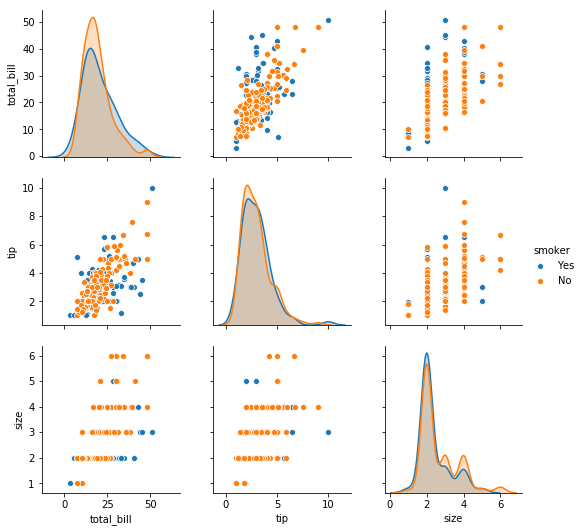

In [31]:
sns.pairplot(tips,hue="smoker");

### [Analyser des répartitions avec Kdeplot et PairGrid](#kde)

La méthode `PairGrid(pd.DataFrame)` quant à elle permet d'afficher un grid de dimension du dataFrame passé en argument. Elle est assez utile car elle permet de traçer rapidement des graphiques spécialisés. 

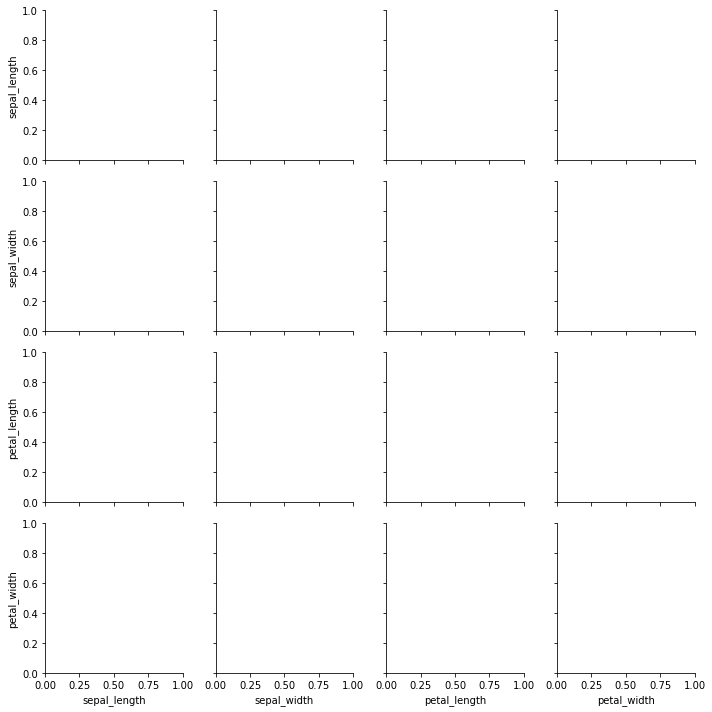

In [32]:
g = sns.PairGrid(iris, diag_sharey=False)

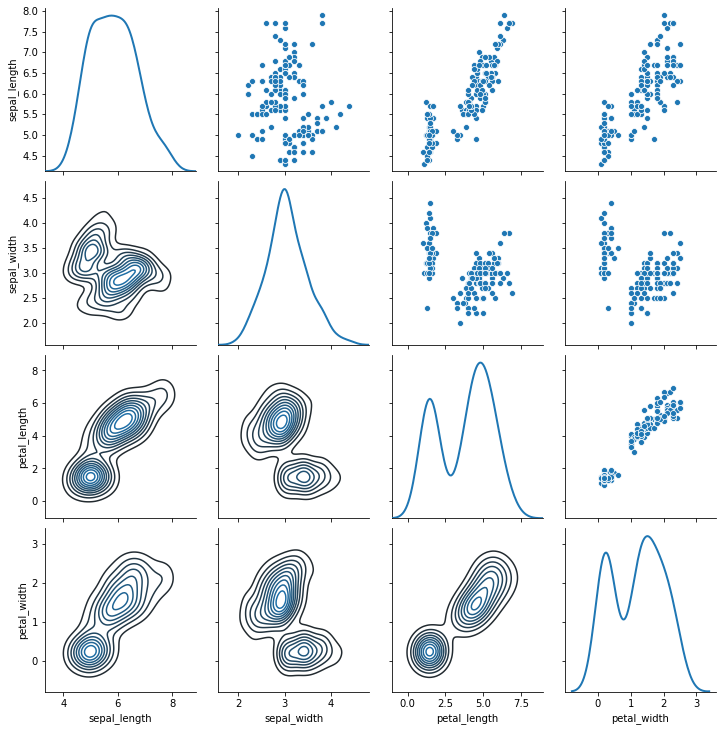

In [17]:
g = sns.PairGrid(iris, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2);

Décomposons ce graphique : 
- la méthode `PairGrid(pd.DataFrame)` comme énoncé ci-dessus affiche un grid de dimension 4
- on reconnait la logique objet de matplotlib dans le fait de déclarer ce grid comme une variable *g*
- on lui ajoute des éléments avec la méthode `map_upper()` qui ajoute des éléments au dessus de la diagonale où l'on affiche un `scatterplot`. 
- on lui ajoute encore d'autres éléments avec la méthode `map_lower()` cette fois, qui va placer les éléments en dessous de la diagonale où l'on affiche un `kdeplot`.
- pour finir on remplit la diagonale avec `map_diag()` où l'on affiche la distribution de la variable. 

Comme vous pouvez le voir on a un graphique assez complet avec peu de lignes de code, ce qui est fort agréable 👌

### [Ajouter plus informations avec Joinplot](#join) 

Cette méthode nous permets de visualiser très rapidement la distribution ainsi que la corrélation de deux variables en elles tout en ayant un rendu assez sympathique 👀

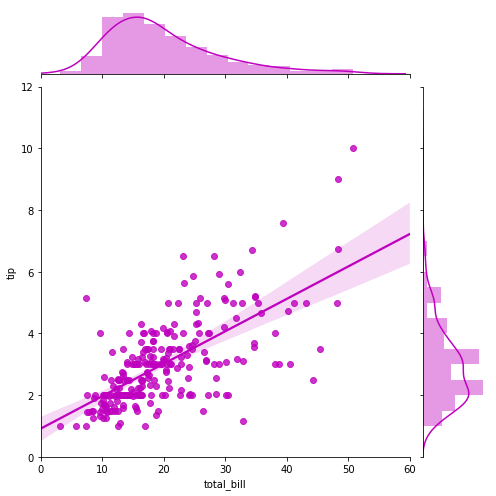

In [34]:
g = sns.jointplot("total_bill", "tip", data=tips,
                  kind="reg",xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

Voyons les arguments de cette méthode `joinplot()`:
* `kind` qui représente le type de plot
* `xlim` et `ylim` sont des arguments pour gérer les echelles/graduations des axes x et y 
* `color` pour la couleur 
* `height` pour la taille

### [Expliciter les relations avec Relplot](#rel)

La fonction `relplot` pour relational plot, ou encore scatter plot permet d'afficher un nuage de point rapidement avec des options intéressantes 🤔

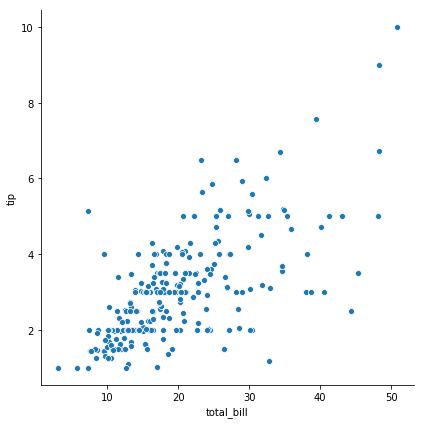

In [35]:
sns.relplot(x="total_bill", y="tip", data = tips, height=6);

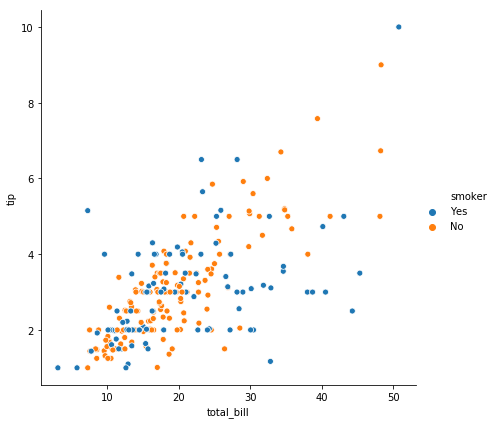

In [36]:
#ajout de la variable 'smoker' au graphique  
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips, height=6);

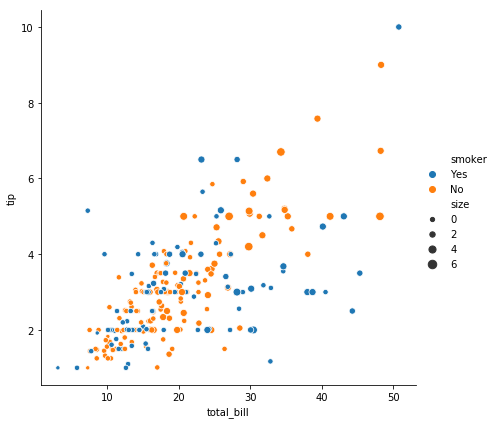

In [37]:
#ajout de la variable 'size' comme dimension supplémentaire
sns.relplot(x="total_bill", y="tip", hue="smoker", size="size" ,data=tips, height=6);

On peut aussi utiliser l'argument `col` pour ajouter une dimension en plus  🤓

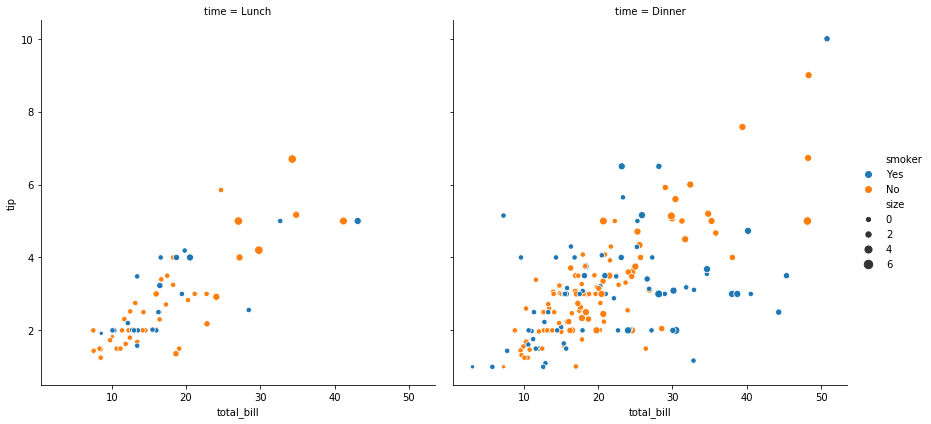

In [40]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            size="size" ,data=tips, col='time', height=6);

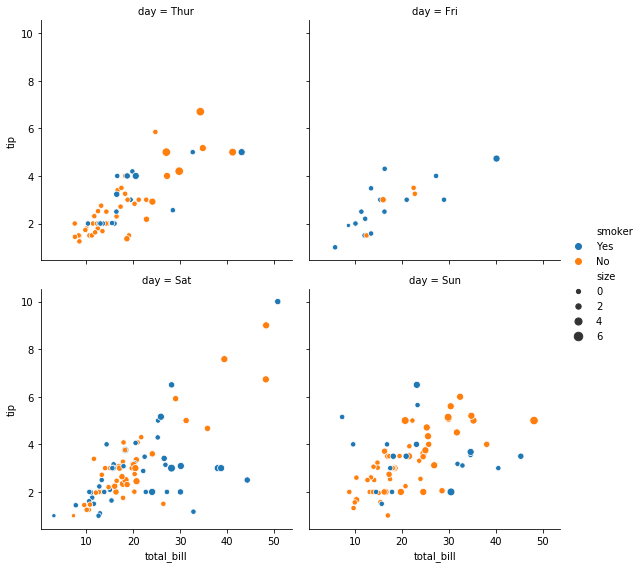

In [49]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            size="size" ,data=tips, col='day',col_wrap=2, height=4);

## Ressource en + 

- Les [tutoriels officielles](https://seaborn.pydata.org/tutorial.html) de seaborn 
- Le très bon tutoriel point par point de [tutorialspoint](https://www.tutorialspoint.com/seaborn/index.htm)